# Titanic

## Iteration 1

### Eploration

In [72]:
import pandas as pd

In [95]:
df_train = pd.read_csv('data/titanic/train.csv')
df_test = pd.read_csv('data/titanic/test.csv')

In [96]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
# First Method
for col_name in df_train.columns:
    print(df_train.isna()[col_name].value_counts())

# Second method
df_train.info()
df_train.isnull().sum()

False    891
Name: PassengerId, dtype: int64
False    891
Name: Survived, dtype: int64
False    891
Name: Pclass, dtype: int64
False    891
Name: Name, dtype: int64
False    891
Name: Sex, dtype: int64
False    714
True     177
Name: Age, dtype: int64
False    891
Name: SibSp, dtype: int64
False    891
Name: Parch, dtype: int64
False    891
Name: Ticket, dtype: int64
False    891
Name: Fare, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
# On ne conserve qe les colonnes les plus simples et les plus pertinentes
y_train = df_train['Survived']
x_train = df_train[['Sex', 'Pclass']]
x_test = df_test[['Sex', 'Pclass']]

In [127]:
x_train.head()

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3


<AxesSubplot:ylabel='Sex'>

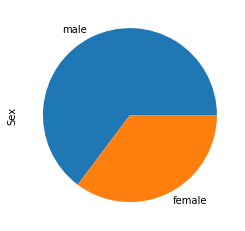

In [128]:
x_train['Sex'].value_counts().plot.pie()

<AxesSubplot:ylabel='Pclass'>

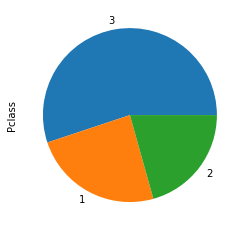

In [129]:
x_train['Pclass'].value_counts().plot.pie()

## Preprocessing

In [130]:
x_train['IsFemale'] = (x_train['Sex'] == 'female').astype(int)
x_train['IsMale'] = (x_train['Sex'] == 'male').astype(int)
x_train.drop(['Sex'], axis=1, inplace=True)

x_test['IsFemale'] = (x_test['Sex'] == 'female').astype(int)
x_test['IsMale'] = (x_test['Sex'] == 'male').astype(int)
x_test.drop(['Sex'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [131]:
x_train.head()

,Pclass,IsFemale,IsMale
0,3,0,1
1,1,1,0
2,3,1,0
3,1,1,0
4,3,0,1


## Model

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
model = LogisticRegression(random_state=0)

In [134]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [145]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [146]:
from sklearn.metrics import accuracy_score

In [148]:
print(accuracy_score(y_train, y_train_pred))

0.7867564534231201


In [149]:
x_test.head()

,Pclass,IsFemale,IsMale
0,3,0,1
1,3,1,0
2,2,0,1
3,3,0,1
4,3,1,0


In [ ]:
y_test_pred = pd.DataFrame(y_test_pred)

In [1]:
import pandas as pd

In [24]:
df_train = pd.read_csv('./data/train.csv')
x_test = pd.read_csv('./data/test.csv')

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
# First Method
for col_name in df_train.columns:
    print(df_train.isna()[col_name].value_counts())

# Second method
df_train.info()
df_train.isnull().sum()

False    891
Name: PassengerId, dtype: int64
False    891
Name: Survived, dtype: int64
False    891
Name: Pclass, dtype: int64
False    891
Name: Name, dtype: int64
False    891
Name: Sex, dtype: int64
False    714
True     177
Name: Age, dtype: int64
False    891
Name: SibSp, dtype: int64
False    891
Name: Parch, dtype: int64
False    891
Name: Ticket, dtype: int64
False    891
Name: Fare, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# On ne conserve qe les colonnes les plus simples et les plus pertinentes
x_test = df_train['Survived']
x_train = df_train[['Age', 'Pclass']]

In [31]:
x_train.head()

,Age,Sex,Pclass
0,22.0,male,3
1,38.0,female,1
2,26.0,female,3
3,35.0,female,1
4,35.0,male,3
